### 任务描述

面对激烈的市场竞争，各个航空公司都推出了更多的优惠来吸引客户。国内某航空司常面临着旅客流失、竞争力下降和资源未充分利用等经营危机。通过建立合理的客户价值评估模型，对客户进行分群，分析及比较不同客户群的客户价值，并制定相应的营销策略，对不同的客户群提供个性化的服务。

### 相关知识

**了解航空公司现状**

目前该航空公司已积累了大量的会员档案信息和其乘坐航班记录。

以2014年3月3日为结束时间，选取宽度为两年的时间段作为分析观测窗口，抽取观测窗口内有乘机记录的所有客户的详细数据，形成历史数据，总共62988条记录。其中包含了会员卡号、入会时间、性别、年龄、会员卡级别、工作地城市、工作地所在省份、工作地所在国家、观测的窗口结束时间、总累计积分、观测窗口的总飞行千米数、观测窗口内的飞行次数、平均乘机时间间隔和平均折扣系数等特征。

![jupyter](https://i.loli.net/2021/06/02/NpnX9FLdgxlQwA4.png)

表属性：

| 特征名称    |特征说明    |
| ------------ | ------------|
| MEMBER_NO   | 会员卡号   |
| FFP_DATE    | 入会时间   |
| FIRST_FLIGHT_DATE    | 第一次飞行日期   |
|GENDER|性别|
|FFP_TIER|会员卡级别|
|WORK_CITY|工作地城市|
|WORK_PROVINCE|工作地所在省份|
|WORK_COUNTRY|工作地所在国家|
|AGE|年龄|
|FLIGHT_COUNT|观测窗口内的飞行次数|
|LOAD_TIME|观测窗口的结束时间|
|LAST_TO_END|最后一次乘机时间至观测窗口结束时长|
|AVG_DISCOUNT|平均折扣率|
|SUM_YR|观测窗口的票价收入|
|SEG_KM_SUM|观测窗口的总飞行公里数|
|LAST_FLIGHT_DATE|末次飞行日期|
|AVG_INTERVAL|平均乘机时间间隔|
|MAX_INTERVAL|最大乘机间隔|
|EXCHANGE_COUNT|积分兑换次数|
|EP_SUM|总精英积分|
|PROMOPTIVE_SUM|促销积分|
|PARTNER_SUM|合作伙伴积分|
|POINTS_SUM|总累计积分|
|POINT_NOTFLIGHT|非乘机的积分变动次数|
|BP_SUM|总基本积分|

结合目前航空公司的数据情况，可以实现以下目标。

1)借助航空公司客户数据，对客户进行分群。

2)对不同的客户类别进行特征分析，比较不同类别客户的客户价值。

3)对不同价值的客户类别提供个性化服务，制定相应的营销策略。

**熟悉航空客户价值分析的步骤与流程**

主要包括以下四个步骤：

(1)抽取航空公司2012年4月1日至2014年3月31日的数据。

(2)对抽取的数据进行数据清洗、特征构建和标准化等操作。

(3)基于RFM模型，使用 K-Means算法进行客户分群。

(4)针对模型结果得到不同价值的客户，采用不同的营销手段，提供定制化的服务。

**航空公司客户价值分析**

首先导入分析中用到的各种第三方工具包

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

接着将数据读取到程序中，并查看每个特征属性的相关信息，以便对“脏”数据进行处理

In [2]:
datafile = "../../data/4.3/air_data.csv"
data = pd.read_csv(datafile, encoding="utf-8")
print(data.shape)
print(data.info())

(62988, 44)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MEMBER_NO                62988 non-null  int64  
 1   FFP_DATE                 62988 non-null  object 
 2   FIRST_FLIGHT_DATE        62988 non-null  object 
 3   GENDER                   62985 non-null  object 
 4   FFP_TIER                 62988 non-null  int64  
 5   WORK_CITY                60719 non-null  object 
 6   WORK_PROVINCE            59740 non-null  object 
 7   WORK_COUNTRY             62962 non-null  object 
 8   AGE                      62568 non-null  float64
 9   LOAD_TIME                62988 non-null  object 
 10  FLIGHT_COUNT             62988 non-null  int64  
 11  BP_SUM                   62988 non-null  int64  
 12  EP_SUM_YR_1              62988 non-null  int64  
 13  EP_SUM_YR_2              62988 non-null  int64  
 14  SUM_YR_1  

In [3]:
print(data[0:5])

   MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE GENDER  FFP_TIER    WORK_CITY  \
0      54993  2006/11/02        2008/12/24      男         6            .   
1      28065  2007/02/19        2007/08/03      男         6          NaN   
2      55106  2007/02/01        2007/08/30      男         6            .   
3      21189  2008/08/22        2008/08/23      男         5  Los Angeles   
4      39546  2009/04/10        2009/04/15      男         6           贵阳   

  WORK_PROVINCE WORK_COUNTRY   AGE   LOAD_TIME  ...  ADD_Point_SUM  \
0            北京           CN  31.0  2014/03/31  ...          39992   
1            北京           CN  42.0  2014/03/31  ...          12000   
2            北京           CN  40.0  2014/03/31  ...          15491   
3            CA           US  64.0  2014/03/31  ...              0   
4            贵州           CN  48.0  2014/03/31  ...          22704   

   Eli_Add_Point_Sum  L1Y_ELi_Add_Points  Points_Sum  L1Y_Points_Sum  \
0             114452              111100      6197

通过观测可知，数据集中存在票价为零但是飞行公里大于零的不合理值，但是所占比例较小，这里直接删去

In [4]:
data = data[data["SUM_YR_1"].notnull() & data["SUM_YR_2"].notnull()]
index1 = data["SUM_YR_1"] != 0
index2 = data["SUM_YR_2"] != 0
index3 = (data["SEG_KM_SUM"] == 0) & (data["avg_discount"] == 0)
data = data[index1 | index2| index3]
print(data.shape)

(62044, 44)


删除后剩余的样本值是62044个，可见异常样本的比例不足1.5%，因此不会对分析结果产生较大的影响。

原始数据集的特征属性太多，而且各属性不具有降维的特征，故这里选取几个对航空公司来说比较有价值的几个特征进行分析，这里并没有完全按照书中的做法选取特征，最终选取的特征是第一年总票价、第二年总票价、观测窗口总飞行公里数、飞行次数、平均乘机时间间隔、观察窗口内最大乘机间隔、入会时间、观测窗口的结束时间、平均折扣率这八个特征。下面说明这么选的理由：

1.选取的特征是第一年总票价、第二年总票价、观测窗口总飞行公里数是要计算平均飞行每公里的票价，因为对于航空公司来说并不是票价越高，飞行公里数越长越能创造利润，相反而是那些近距离的高等舱的客户创造更大的利益。

2.当然总飞行公里数、飞行次数也都是评价一个客户价值的重要的指标。

3.入会时间可以看出客户是不是老用户及忠诚度。

4.通过平均乘机时间间隔、观察窗口内最大乘机间隔可以判断客户的乘机频率是不是固定。

5.平均折扣率可以反映出客户给公里带来的利益，毕竟来说越是高价值的客户享用的折扣率越高。

In [5]:
filter_data = data[[ "FFP_DATE", "LOAD_TIME", "FLIGHT_COUNT", "SUM_YR_1", "SUM_YR_2", "SEG_KM_SUM", "AVG_INTERVAL" , "MAX_INTERVAL", "avg_discount"]]
filter_data[0:5]

,FFP_DATE,LOAD_TIME,FLIGHT_COUNT,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,AVG_INTERVAL,MAX_INTERVAL,avg_discount
0,2006/11/02,2014/03/31,210,239560.0,234188.0,580717,3.483254,18,0.961639
1,2007/02/19,2014/03/31,140,171483.0,167434.0,293678,5.194245,17,1.252314
2,2007/02/01,2014/03/31,135,163618.0,164982.0,283712,5.298507,18,1.254676
3,2008/08/22,2014/03/31,23,116350.0,125500.0,281336,27.863636,73,1.090870
4,2009/04/10,2014/03/31,152,124560.0,130702.0,309928,4.788079,47,0.970658


对特征进行变换：

In [6]:
data["LOAD_TIME"] = pd.to_datetime(data["LOAD_TIME"])
data["FFP_DATE"] = pd.to_datetime(data["FFP_DATE"])
data["入会时间"] = data["LOAD_TIME"] - data["FFP_DATE"]
data["平均每公里票价"] = (data["SUM_YR_1"] + data["SUM_YR_2"]) / data["SEG_KM_SUM"]
data["时间间隔差值"] = data["MAX_INTERVAL"] - data["AVG_INTERVAL"]
deal_data = data.rename(
    columns = {"FLIGHT_COUNT" : "飞行次数", "SEG_KM_SUM" : "总里程", "avg_discount" : "平均折扣率"},
    inplace = False
)
filter_data = deal_data[["入会时间", "飞行次数", "平均每公里票价", "总里程", "时间间隔差值", "平均折扣率"]]
print(filter_data[0:5])
filter_data['入会时间'] = filter_data['入会时间'].astype(np.int64)/(60*60*24*10**9)
print(filter_data[0:5])
print(filter_data.info())

       入会时间  飞行次数   平均每公里票价     总里程     时间间隔差值     平均折扣率
0 2706 days   210  0.815798  580717  14.516746  0.961639
1 2597 days   140  1.154043  293678  11.805755  1.252314
2 2615 days   135  1.158217  283712  12.701493  1.254676
3 2047 days    23  0.859648  281336  45.136364  1.090870
4 1816 days   152  0.823617  309928  42.211921  0.970658
     入会时间  飞行次数   平均每公里票价     总里程     时间间隔差值     平均折扣率
0  2706.0   210  0.815798  580717  14.516746  0.961639
1  2597.0   140  1.154043  293678  11.805755  1.252314
2  2615.0   135  1.158217  283712  12.701493  1.254676
3  2047.0    23  0.859648  281336  45.136364  1.090870
4  1816.0   152  0.823617  309928  42.211921  0.970658
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62044 entries, 0 to 62978
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   入会时间     62044 non-null  float64
 1   飞行次数     62044 non-null  int64  
 2   平均每公里票价  62044 non-null  float64
 3   总里程      62044 non-null  

<ipython-input-6-94ada4399959>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_data['入会时间'] = filter_data['入会时间'].astype(np.int64)/(60*60*24*10**9)


由于不同的属性相差范围较大，这里进行标准化处理

In [7]:
filter_zscore_data = (filter_data - filter_data.mean(axis=0))/(filter_data.std(axis=0))
filter_zscore_data[0:5]

,入会时间,飞行次数,平均每公里票价,总里程,时间间隔差值,平均折扣率
0,1.435707,14.034016,0.605115,26.761154,-0.987974,1.295540
1,1.307152,9.073213,1.812903,13.126864,-1.019566,2.868176
2,1.328381,8.718869,1.827807,12.653481,-1.009128,2.880950
3,0.658476,0.781585,0.761692,12.540622,-0.631155,1.994714
4,0.386032,9.923636,0.633034,13.898736,-0.665235,1.344335


对于K-Means方法，k的取值是一个难点，因为是无监督的聚类分析问题，所以不寻在绝对正确的值，需要进行研究试探。这里采用计算SSE的方法，尝试找到最好的K数值。编写函数如下：

In [8]:
import warnings
warnings.filterwarnings("ignore")


def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(data)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(filter_zscore_data)

簇数是 2 时； SSE是 296587.92694098066
簇数是 3 时； SSE是 245318.16747807685
簇数是 4 时； SSE是 209301.49550319155
簇数是 5 时； SSE是 183886.88783764106
簇数是 6 时； SSE是 167465.52501845785
簇数是 7 时； SSE是 151869.61069369144
簇数是 8 时； SSE是 142924.50277421754
簇数是 9 时； SSE是 135003.45171636555


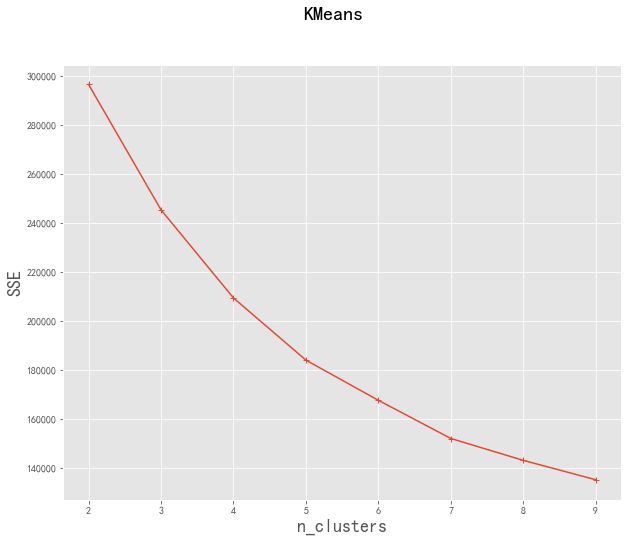

In [9]:
#画图，通过观察SSE与k的取值尝试找出合适的k值
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['font.size'] = 12.0
plt.rcParams['axes.unicode_minus'] = False
# 使用ggplot的绘图风格
plt.style.use('ggplot')
## 绘图观测SSE与簇个数的关系
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(1,1,1)
ax.plot(nums,SSE,marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

观察图像，并没有的所谓的“肘”点出现，是随k值的增大逐渐减小的，这里选取当k分别取4， 5， 6时进行，看能不能通过分析结果来反向选取更合适的值，k取值4时的客户群特征分析图如下：

![jupyter](https://i.loli.net/2021/06/18/teTh1NXl4JEZAy7.png)

k取值5，6时的代码与上述类似，不再给出，直接给出结果图

![jupyter](https://i.loli.net/2021/06/02/O7nqbuxKAfBXYz9.png)

![jupyter](https://i.loli.net/2021/06/02/YbZIgOTX46surE8.png)

通过观察可知：

当k取值4时，每个人群包含的信息比较复杂，且特征不明显

当k取值5时，分析的结果比较合理，分出的五种类型人群都有自己的特点又不相互重复

当k取值6时，各种人群也都有自己的特点，但是第4簇人群完全在第5簇人群特征中包含了，有点冗余的意思

综上，当k取值为5时，得到最好的聚类效果，将所有的客户分成5个人群，再进一步分析可以得到以下结论：

1.第一簇人群，10957人，最大的特点是时间间隔差值最大，分析可能是“季节型客户”，一年中在某个时间段需要多次乘坐飞机进行旅行，其他的时间则出行的不多，这类客户我们需要在保持的前提下，进行一定的发展；

2.第二簇人群，14732人，最大的特点就是入会的时间较长，属于老客户按理说平均折扣率应该较高才对，但是观察窗口的平均折扣率较低，而且总里程和总次数都不高，分析可能是流失的客户，需要在争取一下，尽量让他们“回心转意”；

3.第三簇人群，22188人，各方面的数据都是比较低的，属于一般或低价值用户

4.第四簇人群，8724人，最大的特点就是平均每公里票价和平均折扣率都是最高的，应该是属于乘坐高等舱的商务人员，应该重点保持的对象，也是需要重点发展的对象，另外应该积极采取相关的优惠政策是他们的乘坐次数增加

5.第五簇人群，5443人， 总里程和飞行次数都是最多的，而且平均每公里票价也较高，是重点保持对象

分析完毕，结果表明价值不大的第二三簇的客户数最多，而价值较大的第四五簇的人数较少。

### 编程要求

In [11]:
def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    ********Begin***********
    
    ********End*************
 
 nums, SSE = test_Kmeans_nclusters(filter_zscore_data)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

### 参考答案

In [ ]:
def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
 
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums=range(2,10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num, n_jobs=4)
        kmodel.fit(data_train)
        # 簇中心
        cluster_ceter_list = kmodel.cluster_centers_
        # 个样本属于的簇序号列表
        cluster_list = kmodel.labels_.tolist()
        for index in  range(len(data)):
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是",num , "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE
 
nums, SSE = test_Kmeans_nclusters(filter_zscore_data)